## 1 导入我们需要的包

In [4]:
%matplotlib inline 
# Magic Functions:IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
from sklearn.datasets import load_wine

## 2 导入需要的数据集

In [5]:
wine = load_wine()

##  3 切分训练集和测试集

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3) # Split arrays or matrices into random train and test subsets

## 4 训练和预测

In [43]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(Xtrain,Ytrain)
dtc_score = dtc.score(Xtest,Ytest)

rfc = RandomForestClassifier(random_state=0)
rfc.fit(Xtrain,Ytrain)
rfc_score = rfc.score(Xtest,Ytest)

print("dtc_score:{}".format(dtc_score)
     ,"rfc_score:{}".format(rfc_score)
     )

dtc_score:0.9629629629629629 rfc_score:0.9814814814814815


## 5 交叉验证

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
dtc_cross = cross_val_score(dtc,wine.data,wine.target,cv=10)
rfc_cross = cross_val_score(rfc,wine.data,wine.target,cv=10)
print("dtc_score:{}".format(dtc_cross.mean())
     ,"rfc_score:{}".format(rfc_cross.mean())
     )

dtc_score:0.8705882352941178 rfc_score:0.9777777777777779


## 6 交叉验证折线图

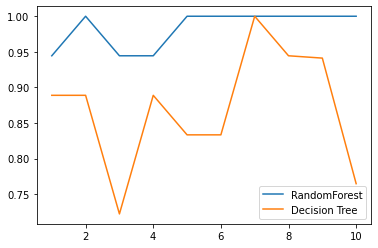

In [23]:
plt.plot(range(1,11),rfc_cross,label = "RandomForest")
plt.plot(range(1,11),dtc_cross,label = "Decision Tree")
plt.legend()
plt.show()

## 7 10次交叉验证

In [10]:
dtc_list = list()
rfc_list = list()
for _ in range(10):
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier(n_estimators=25)
    dtc_cross = cross_val_score(dtc,wine.data,wine.target,cv=10).mean()
    rfc_cross = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    dtc_list.append(dtc_cross)
    rfc_list.append(rfc_cross)
print(dtc_list,rfc_list)

[0.8816993464052288, 0.8594771241830065, 0.865032679738562, 0.8705882352941178, 0.8591503267973856, 0.8702614379084966, 0.8761437908496731, 0.8761437908496731, 0.8702614379084966, 0.8705882352941178] [0.9777777777777779, 0.9722222222222221, 0.9888888888888889, 0.9555555555555555, 0.9718954248366012, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9774509803921569]


## 8 画出随机森林和决策树在十组交叉验证下的效果对比

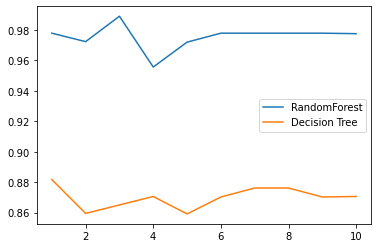

In [11]:
plt.plot(range(1,11),rfc_list,label = "RandomForest")
plt.plot(range(1,11),dtc_list,label = "Decision Tree")
plt.legend()
plt.show()

## 9 n_estimators的学习曲线

0.9888888888888889 25


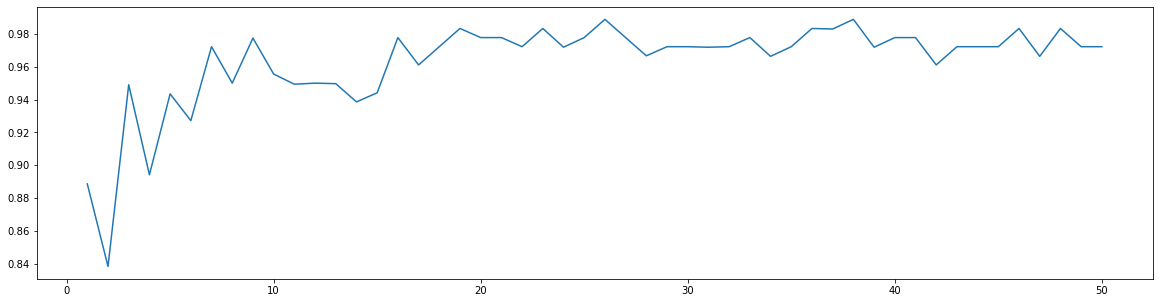

In [13]:
superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,51),superpa)
plt.show()

## 10 random_state

In [1]:
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [33]:
rfc = RandomForestClassifier(n_estimators=5,random_state=4)
rfc = rfc.fit(Xtrain, Ytrain)

In [34]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2005877882),
 DecisionTreeClassifier(max_features='auto', random_state=1720656046),
 DecisionTreeClassifier(max_features='auto', random_state=202860983),
 DecisionTreeClassifier(max_features='auto', random_state=741720773),
 DecisionTreeClassifier(max_features='auto', random_state=2030163841)]

In [35]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

2005877882
1720656046
202860983
741720773
2030163841


## 11 袋外数据来测试

In [49]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target) #重要属性oob_score_
rfc.oob_score_

0.9606741573033708

## 12 重要属性和接口

In [44]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

0.9814814814814815

In [45]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.feature_importances_ # 特征权重

array([0.17590652, 0.03117466, 0.01356113, 0.02387372, 0.02317802,
       0.06505726, 0.18408287, 0.01553266, 0.01149248, 0.13952866,
       0.08105922, 0.10959456, 0.12595824])

In [46]:
rfc.apply(Xtest)  # 每个决策树叶子节点的索引

array([[24, 16, 21, ..., 11, 18, 14],
       [ 8,  8, 14, ...,  5,  5,  7],
       [21, 16, 21, ..., 11, 18, 14],
       ...,
       [ 5,  3,  9, ...,  7, 16,  9],
       [ 4,  3,  9, ...,  7, 16,  9],
       [ 2,  8, 13, ...,  5,  5,  7]], dtype=int64)

In [47]:
rfc.predict(Xtest) # 预测结果

array([0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 2, 2, 1])

In [48]:
rfc.predict_proba(Xtest) # 预测分类结果的比例

array([[0.92, 0.08, 0.  ],
       [0.12, 0.84, 0.04],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.  , 0.96],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.92, 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.8 , 0.2 , 0.  ],
       [0.  , 0.04, 0.96],
       [0.04, 0.92, 0.04],
       [0.  , 0.08, 0.92],
       [0.08, 0.84, 0.08],
       [0.96, 0.04, 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.92, 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.68, 0.32, 0.  ],
       [0.04, 0.2 , 0.76],
       [0.  , 0.24, 0.76],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.04, 0.96, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.52, 0.48],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
 

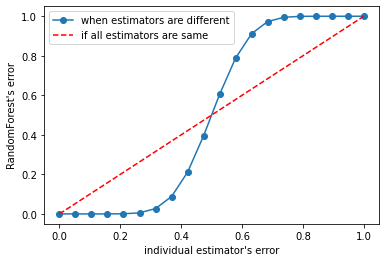

In [54]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()